In [61]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

from math import sin, cos, pi

# Задание 1:

На занятии мы разбирали, как осуществить поворот изображения с помощью матрицы поворота. Однако мы с вами заметили, что поворот происходит относительно нуля координат, что может приводить не совсем к тому результату, который мы ожидаем получить. Задача состоит в том, чтобы повернуть изображение относительно его центра (а не начала координат). Подсказка: вспомните идею решения, которую мы обсуждали на занятии - необходимо сделать перенос центра изображения в начало СК, затем осуществить поворот, а затем перенести обратно в центр. Дополнительный вопрос: можем ли мы эти три преобразования соединить в одно? Другими словами, построить композицию преобразований в виде единой матрицы? Как это сделать? Для проведения экспериментов используйте изображение messi5.jpg

# Задание 2:

В папке находятся изображения (все кроме messi5.jpg), которые были подвернуты различным деформациям. Используя аффинные преобразования, необходимо "выправить" эти изображения (привести в исходный вид).


In [2]:
img = cv.imread('./messi5.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

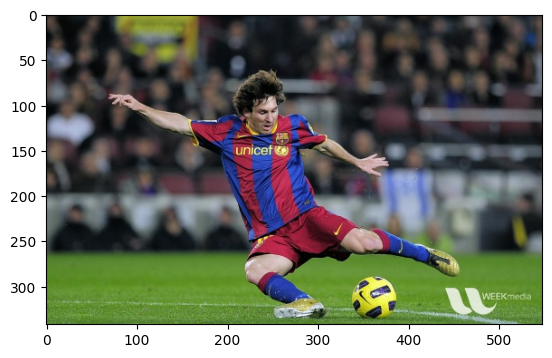

In [3]:
plt.imshow(img)

# Задание 1:

In [29]:
def rotate_img(img, angle):

    height, width = img.shape[0], img.shape[1]
    c_y, c_x = height//2, width//2

    rotationMatrix = cv.getRotationMatrix2D((c_x, c_y), angle, 1.0)

    rotatingimage = cv.warpAffine(
        img,
        rotationMatrix,
        (width, height),
        flags=cv.INTER_LINEAR
    )

    return rotatingimage

In [32]:
new_img = rotate_img(img, -30)

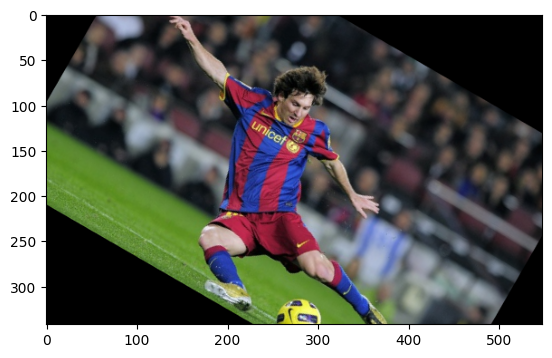

In [33]:
plt.imshow(new_img)

# Задание 2:

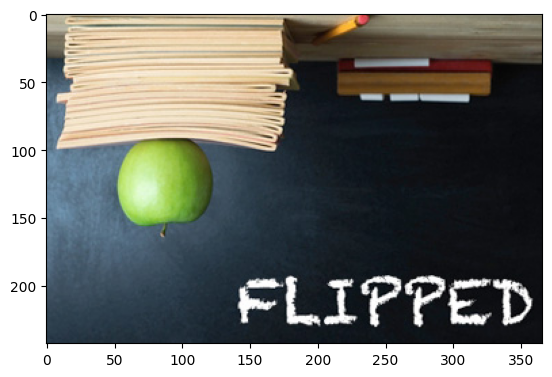

In [41]:
img = cv.imread('./apple.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)

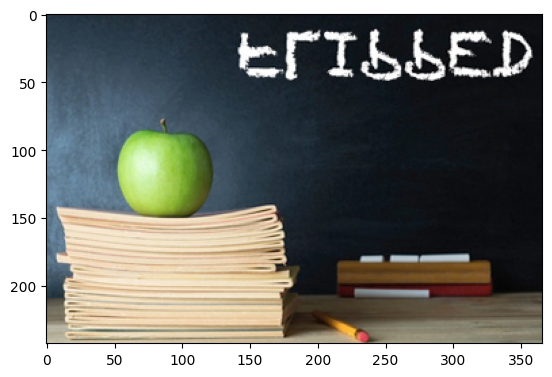

In [45]:
plt.imshow(cv.flip(img, 0))

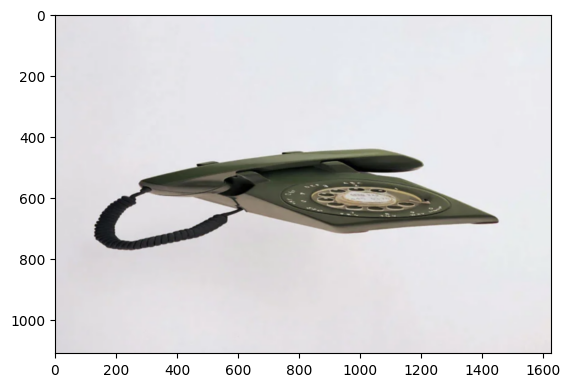

In [57]:
img = cv.imread('./phone.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)

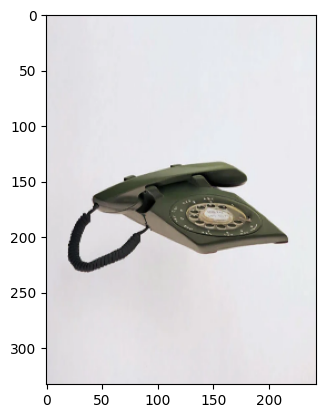

In [59]:
height, width, _ = img.shape

Rs = np.float32([
    [0.15, 0, 0],
    [0, 0.3, 0]
])

dst_size = (
    int(width  * 0.15),
    int(height * 0.3)
)
result = cv.warpAffine(img, Rs, dst_size)

plt.imshow(result)

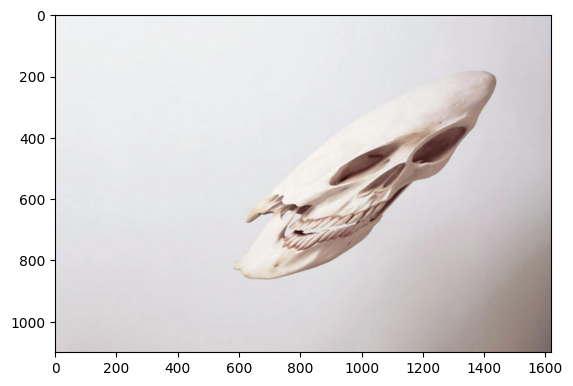

In [65]:
img = cv.imread('./skull.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)

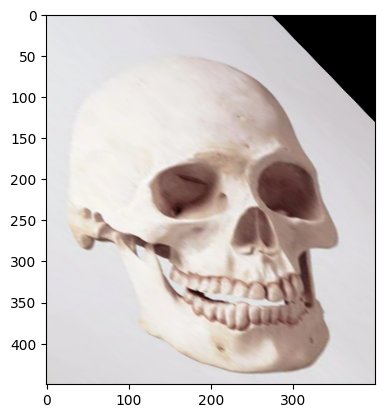

In [66]:
height, width = img.shape[:2]
angle30 =  -30 * pi / 180
tx = -width/2
ty = -height/2

M0 = np.float32([
    [cos(angle30), -sin(angle30), 0],
    [sin(angle30), cos(angle30), 0],
    [0, 0, 1]]
)
M1 = np.float32([
    [1, 0, tx],
    [0, 1, ty],
    [0, 0, 1]
])
M2 = np.float32([
    [1, 0, -tx],
    [0, 1, -ty],
    [0, 0, 1]
])
Rs = np.float32([
    [0.5, 0.25, 0],
    [0.5, 1, 0],
    [0, 0, 1]
]
)
T = np.float32([
    [1, 0, -700],
    [0, 1, -810],
    [0, 0, 1]
])

D = T@M2@M0@M1@Rs

img = cv.warpAffine(img, D[0:2], (400, 450))
plt.imshow(img)

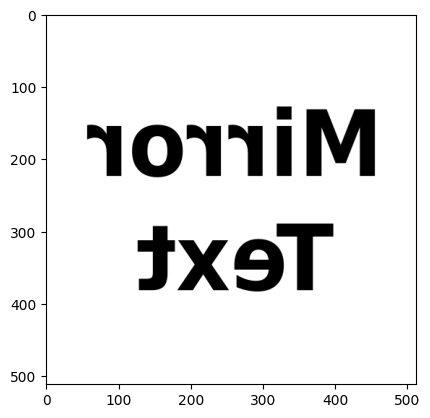

In [46]:
img = cv.imread('./text.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)

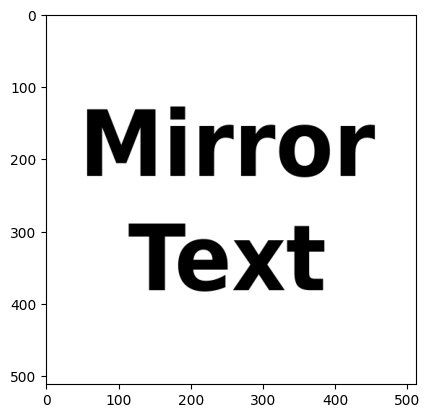

In [47]:
plt.imshow(cv.flip(img, 1))